In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import logging

logging.basicConfig(level='INFO', format='%(asctime)s %(message)s',
                    datefmt='%d-%b-%y %H:%M:%S')

In [284]:
from replay_identification.utilities import load_data

epoch_key = 'bon', 3, 2

data = load_data(epoch_key)

06-Oct-20 14:50:26 Loading data...
06-Oct-20 14:56:05 Failed to load file: /Users/edeno/Documents/GitHub/replay_identification/replay_identification/../Raw-Data/Bond/bonDIO03.mat
06-Oct-20 14:56:05 No DIO file found, using distance from well to segment trials
06-Oct-20 14:56:05 Failed to load file: /Users/edeno/Documents/GitHub/replay_identification/replay_identification/../Raw-Data/Bond/bonDIO03.mat
06-Oct-20 14:56:05 No DIO file found, inferring correct inbound/outbound from task rules
06-Oct-20 14:56:11 Finding multiunit high synchrony events...
06-Oct-20 14:56:21 Finding ripple times...
06-Oct-20 15:11:37 Failed to load file: /Users/edeno/Documents/GitHub/replay_identification/replay_identification/../Raw-Data/Bond/bonDIO03.mat
06-Oct-20 15:11:37 No DIO file found, using distance from well to segment trials
06-Oct-20 15:11:38 Failed to load file: /Users/edeno/Documents/GitHub/replay_identification/replay_identification/../Raw-Data/Bond/bonDIO03.mat
06-Oct-20 15:11:38 No DIO file fo

In [4]:
from replay_identification import ReplayDetector

detector_parameters = {
    'movement_var': 6.0,
    'replay_speed': 1,
    'place_bin_size': 2.0,
    'lfp_model_kwargs': {'n_components': 1, 'max_iter': 200, 'tol': 1e-06},
    'spike_model_knot_spacing': 10,
    'spike_model_penalty': 0.5,
    'movement_state_transition_type': 'random_walk'
}

replay_detector = ReplayDetector(**detector_parameters)
logging.info(replay_detector)

05-Oct-20 20:18:46 ReplayDetector(movement_state_transition_type='random_walk', movement_var=6.0,
               spike_model_knot_spacing=10)


In [877]:
from loren_frank_data_processing.position import EDGE_ORDER, EDGE_SPACING

replay_detector.fit(
    is_ripple=data['is_ripple'],
    speed=data['position_info'].speed,
    position=data['position_info'].linear_position,
    spikes=data['spikes'],
    track_graph=data['track_graph'],
    center_well_id=0,
    edge_order=EDGE_ORDER,
    edge_spacing=EDGE_SPACING,
)

07-Oct-20 14:51:39 Fitting speed model...
07-Oct-20 14:51:41 Fitting spiking model...


07-Oct-20 14:52:53 Fitting replay movement state transition...


07-Oct-20 14:52:54 Fitting replay state transition...


ReplayDetector(movement_state_transition_type='random_walk', movement_var=6.0,
               spike_model_knot_spacing=10)

In [878]:
import numpy as np

detector_results = replay_detector.predict(
    speed=data['position_info'].speed,
    position=data['position_info'].linear_position,
    spikes=data['spikes'],
    time=data['position_info'].index / np.timedelta64(1, 's'),
    use_likelihoods=['spikes'],
    use_smoother=True)

detector_results

07-Oct-20 14:52:59 Predicting spikes likelihood...


07-Oct-20 14:53:30 Finding causal replay probability and position...
07-Oct-20 14:53:51 Finding acausal replay probability and position...


<xarray.Dataset>
Dimensions:             (position: 149, state: 2, time: 465497)
Coordinates:
  * time                (time) float64 3.729e+03 3.729e+03 ... 4.66e+03 4.66e+03
  * position            (position) float64 0.9742 2.922 4.871 ... 316.4 318.4
  * state               (state) <U9 'Local' 'Non-Local'
Data variables:
    causal_posterior    (time, state, position) float64 0.0 0.0 ... 1.221e-56
    likelihood          (time, state, position) float64 1.0 1.0 1.0 ... 1.0 1.0
    acausal_posterior   (time, state, position) float64 0.0 0.0 ... 1.221e-56
    replay_probability  (time) float64 0.0 4.771e-13 ... 1.795e-54 1.795e-54

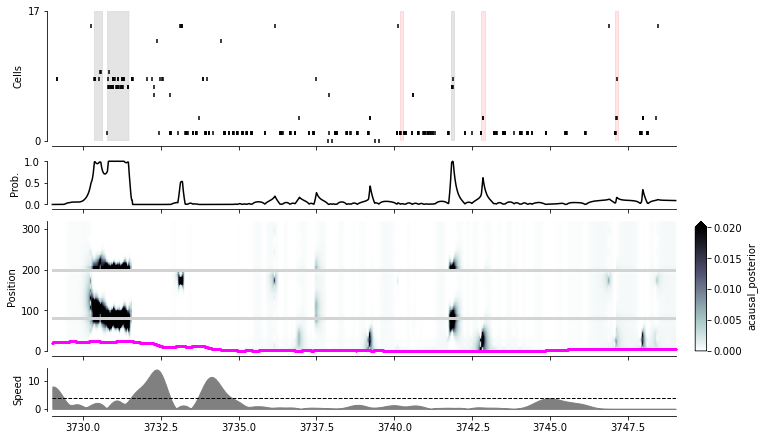

In [879]:
from replay_identification.utilities import plot_detector

time_ind = slice(0, 10_000)

plot_detector(time_ind, data, replay_detector, detector_results)

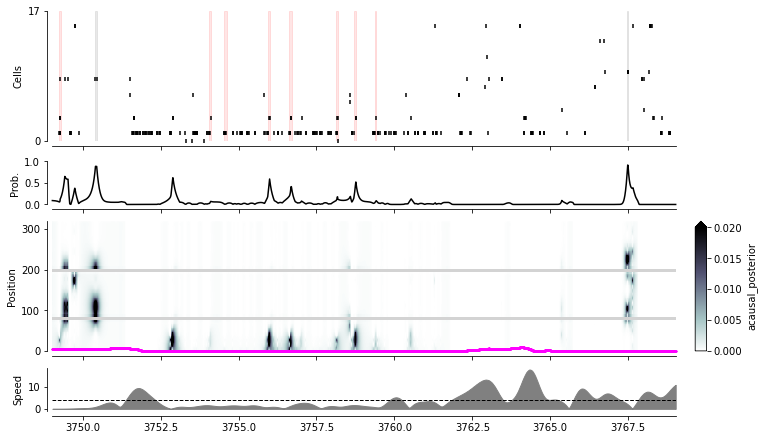

In [780]:
time_ind = slice(10_000, 20_000)

plot_detector(time_ind, data, replay_detector, detector_results)

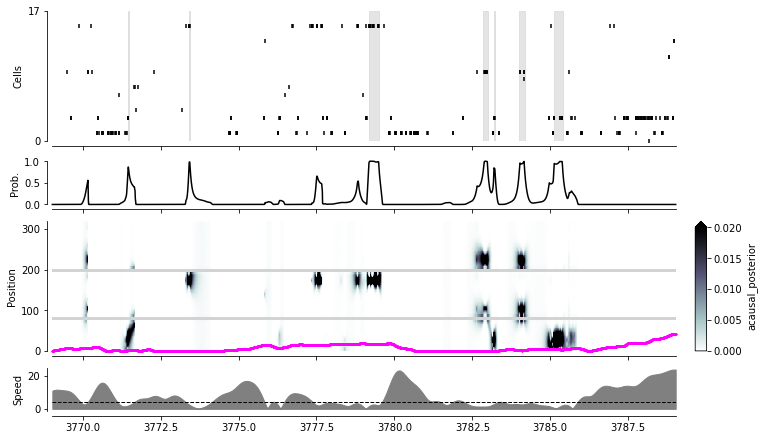

In [880]:
time_ind = slice(20_000, 30_000)

plot_detector(time_ind, data, replay_detector, detector_results)

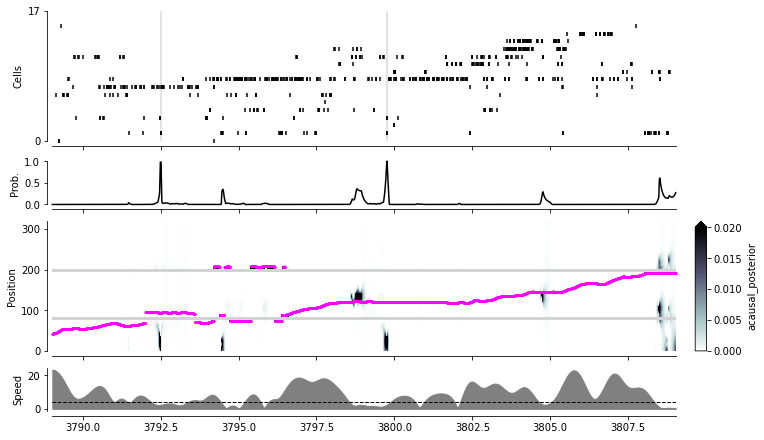

In [783]:
time_ind = slice(30_000, 40_000)

plot_detector(time_ind, data, replay_detector, detector_results)

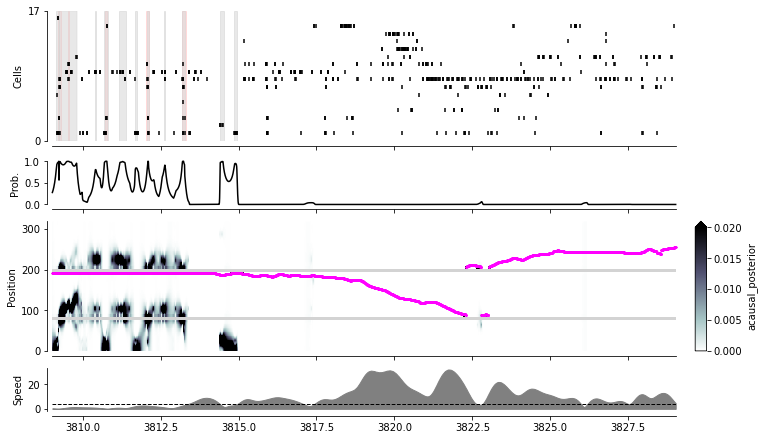

In [784]:
time_ind = slice(40_000, 50_000)

plot_detector(time_ind, data, replay_detector, detector_results)

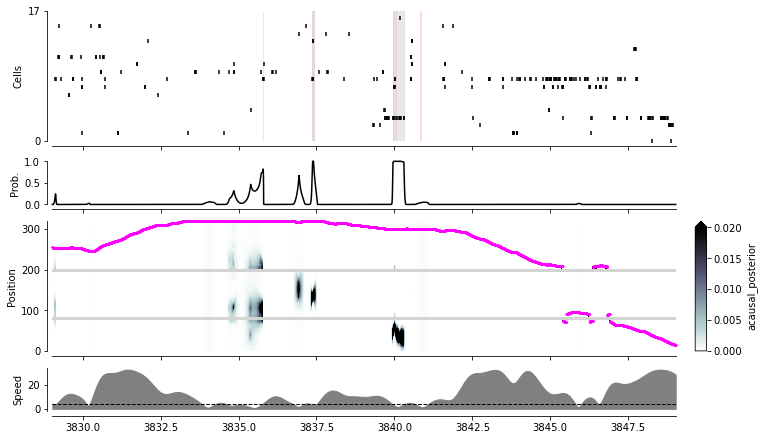

In [785]:
time_ind = slice(50_000, 60_000)

plot_detector(time_ind, data, replay_detector, detector_results)

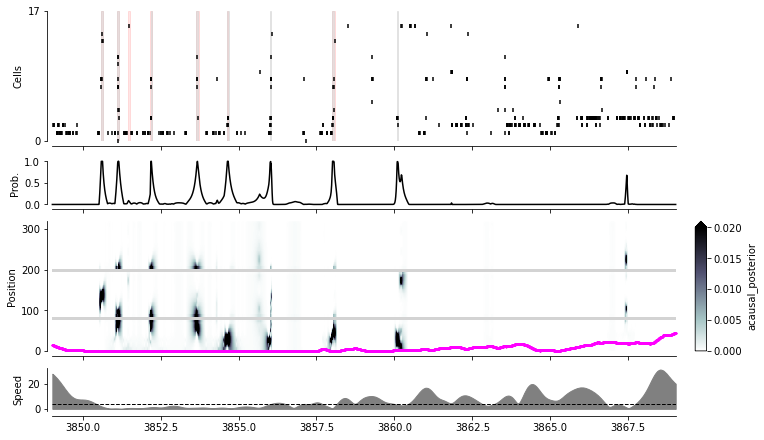

In [786]:
time_ind = slice(60_000, 70_000)

plot_detector(time_ind, data, replay_detector, detector_results)

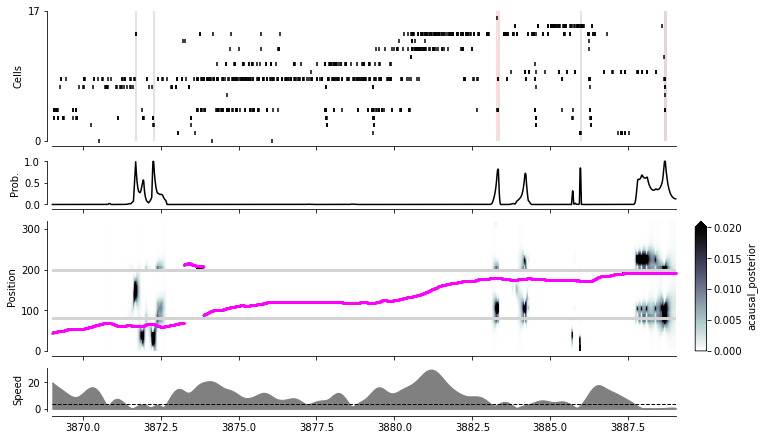

In [787]:
time_ind = slice(70_000, 80_000)

plot_detector(time_ind, data, replay_detector, detector_results)

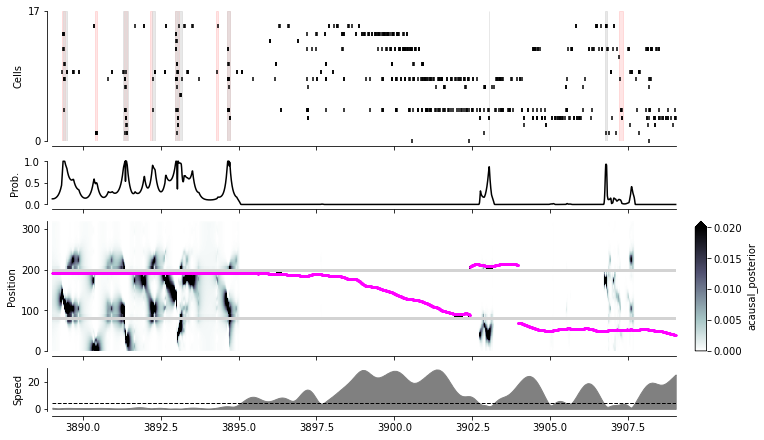

In [788]:
time_ind = slice(80_000, 90_000)

plot_detector(time_ind, data, replay_detector, detector_results)

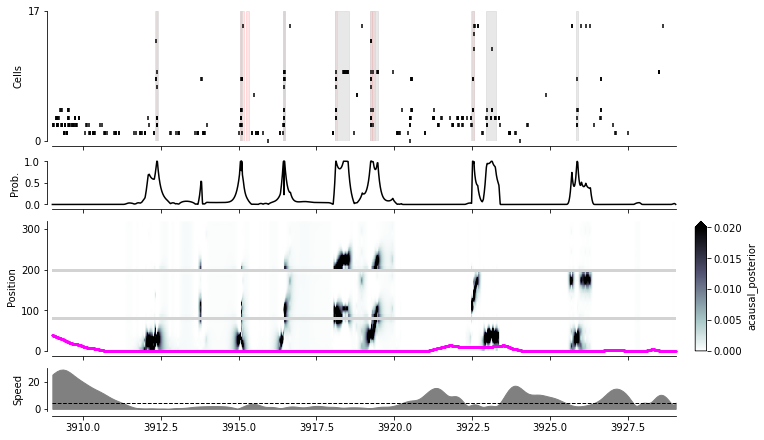

In [789]:
time_ind = slice(90_000, 100_000)

plot_detector(time_ind, data, replay_detector, detector_results)

(0.8, 1.0)

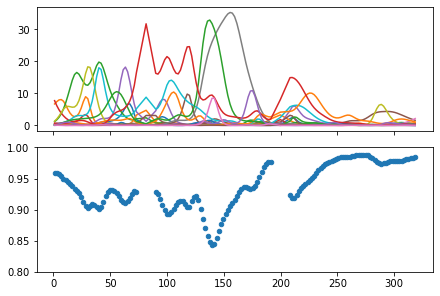

In [790]:
import matplotlib.pyplot as plt


place_fields = (
    replay_detector._spiking_likelihood
    .keywords['place_conditional_intensity']).squeeze()

fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True)
axes[0].plot(replay_detector.place_bin_centers_, place_fields * 500);
axes[1].scatter(replay_detector.place_bin_centers_[replay_detector.is_track_interior_],
            np.prod(np.exp(-place_fields), axis=1)[replay_detector.is_track_interior_], s=20);
axes[1].set_ylim((0.8, 1))

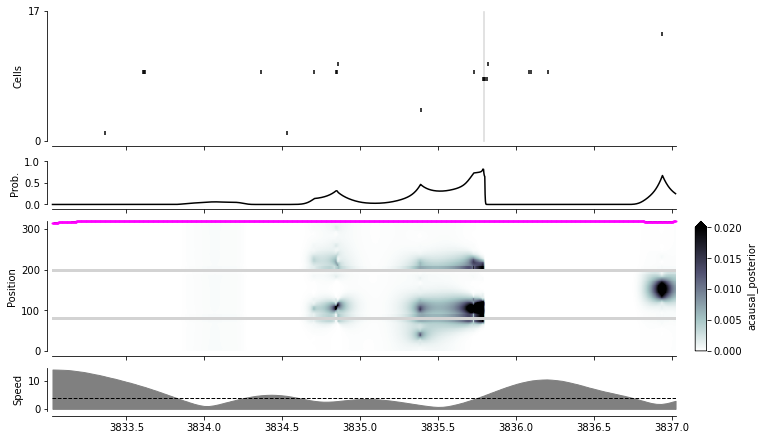

In [791]:
time_ind = slice(52_000, 54_000)

plot_detector(time_ind, data, replay_detector, detector_results)

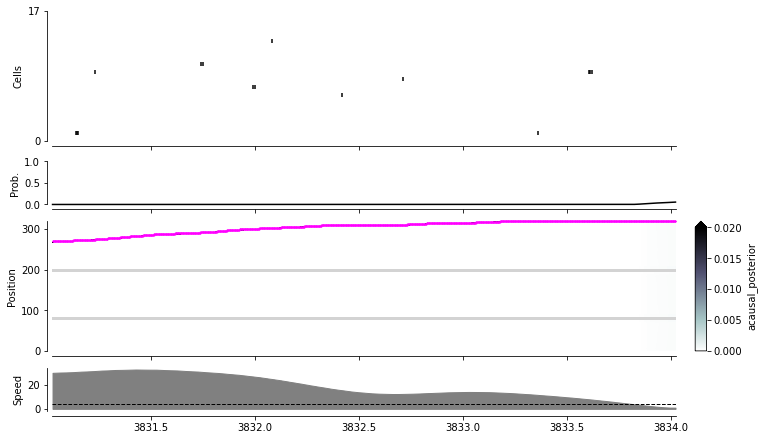

In [792]:
time_ind = slice(51_000, 52_500)

plot_detector(time_ind, data, replay_detector, detector_results)

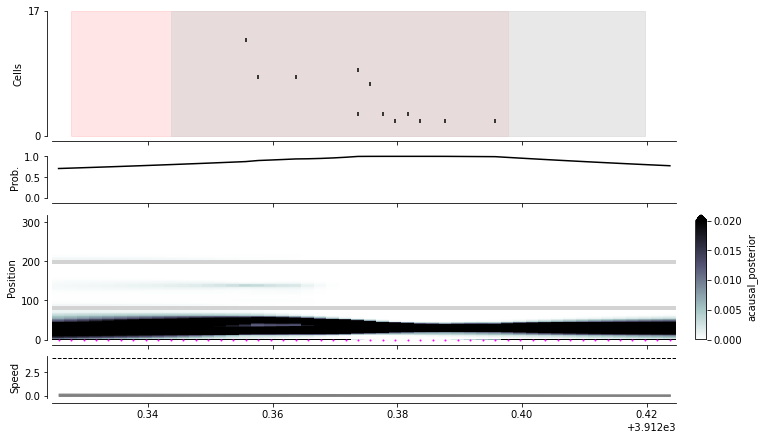

In [793]:
time_ind = slice(91_650, 91_700)

plot_detector(time_ind, data, replay_detector, detector_results)

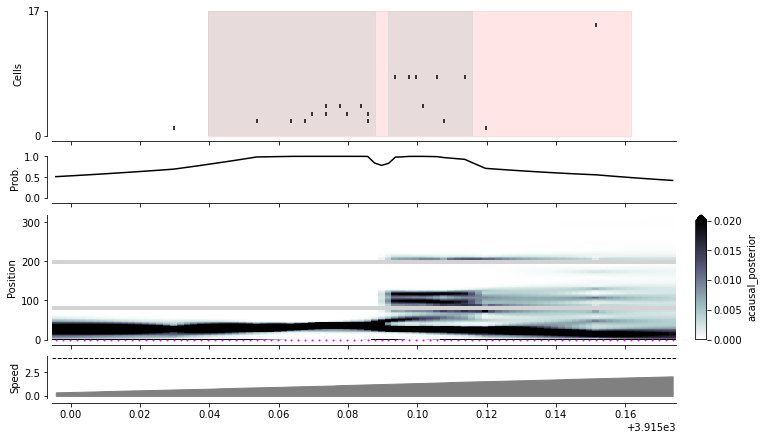

In [794]:
time_ind = slice(92_985, 93_075)

plot_detector(time_ind, data, replay_detector, detector_results)

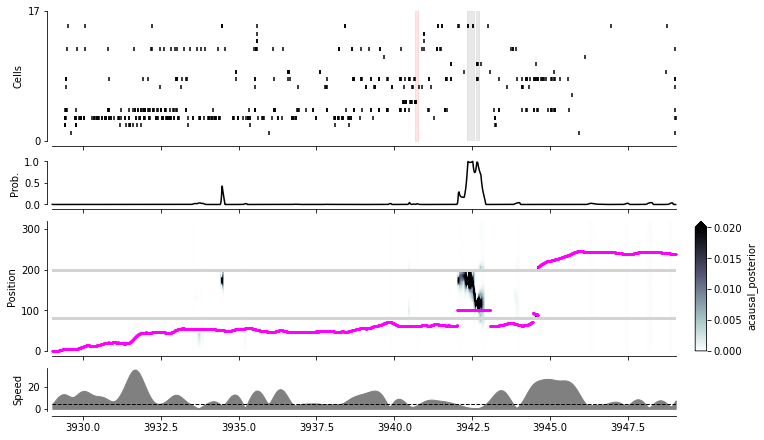

In [795]:
time_ind = slice(100_000, 110_000)

plot_detector(time_ind, data, replay_detector, detector_results)

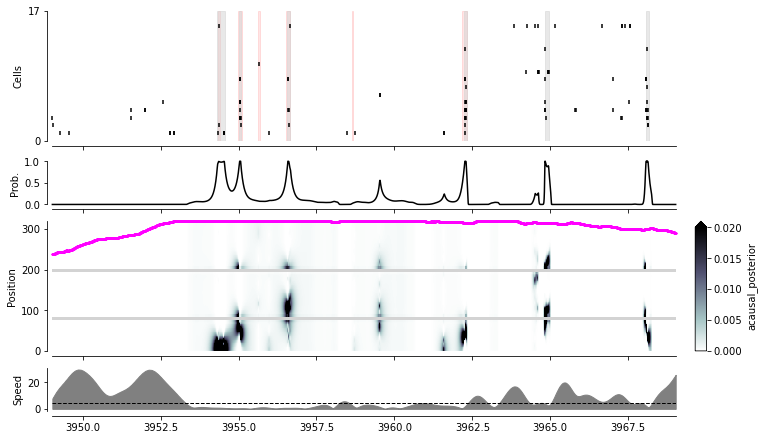

In [796]:
time_ind = slice(110_000, 120_000)

plot_detector(time_ind, data, replay_detector, detector_results)

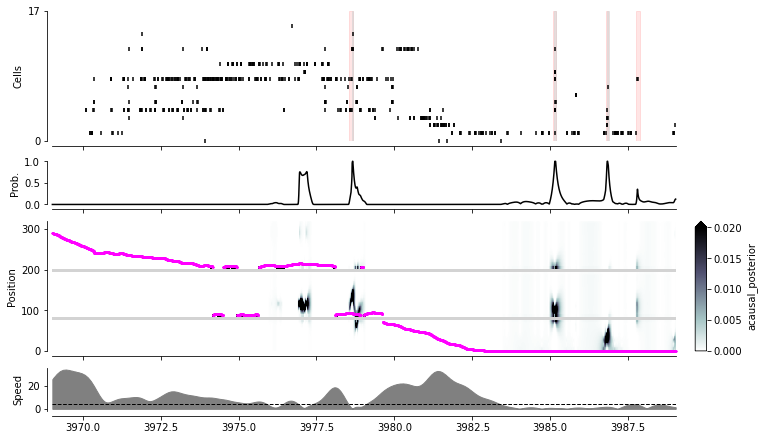

In [798]:
time_ind = slice(120_000, 130_000)

plot_detector(time_ind, data, replay_detector, detector_results)

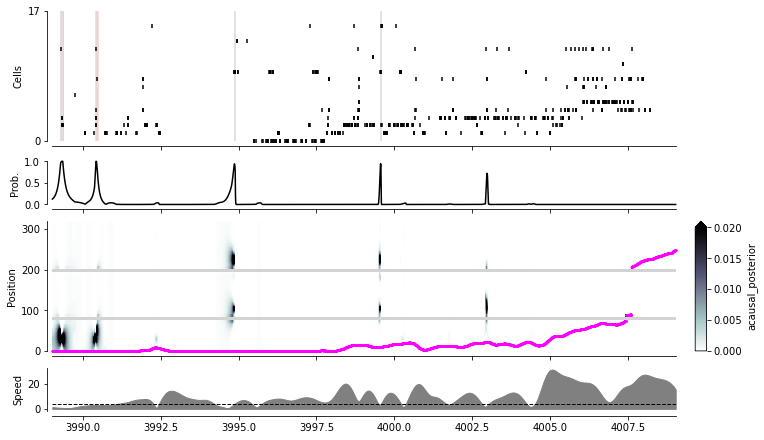

In [800]:
time_ind = slice(130_000, 140_000)

plot_detector(time_ind, data, replay_detector, detector_results)

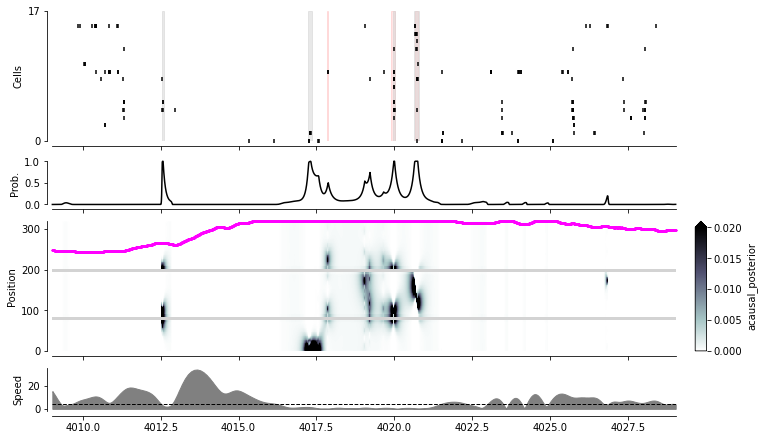

In [801]:
time_ind = slice(140_000, 150_000)

plot_detector(time_ind, data, replay_detector, detector_results)

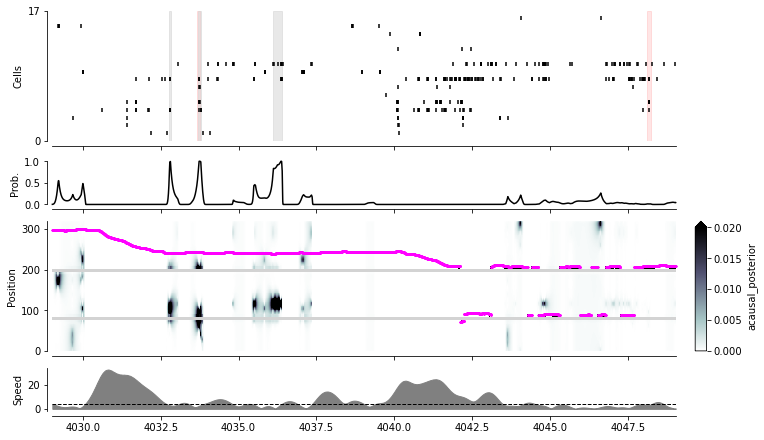

In [802]:
time_ind = slice(150_000, 160_000)

plot_detector(time_ind, data, replay_detector, detector_results)

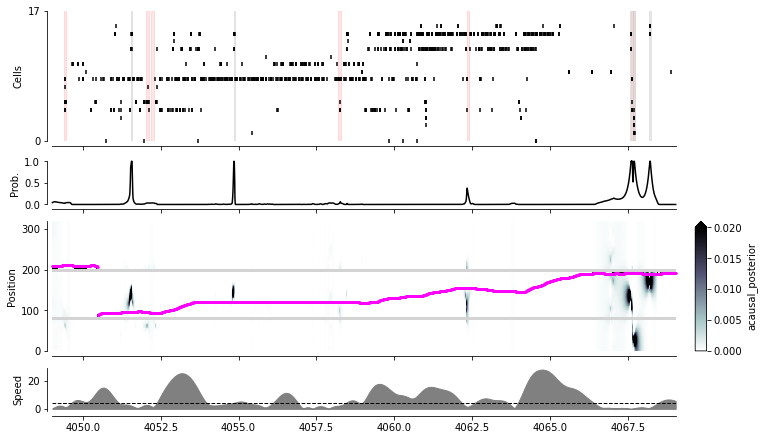

In [803]:
time_ind = slice(160_000, 170_000)

plot_detector(time_ind, data, replay_detector, detector_results)

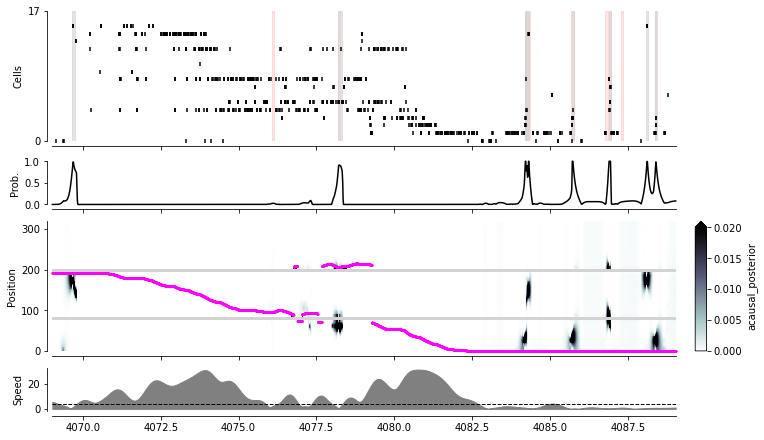

In [876]:
time_ind = slice(170_000, 180_000)

plot_detector(time_ind, data, replay_detector, detector_results)

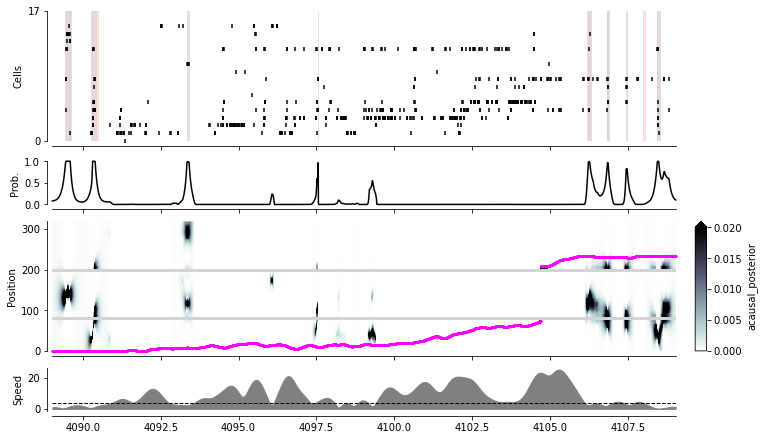

In [875]:
time_ind = slice(180_000, 190_000)

plot_detector(time_ind, data, replay_detector, detector_results)

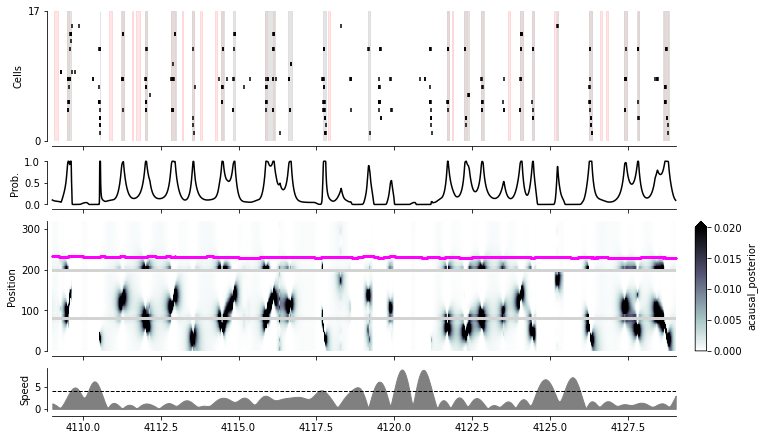

In [874]:
time_ind = slice(190_000, 200_000)

plot_detector(time_ind, data, replay_detector, detector_results)

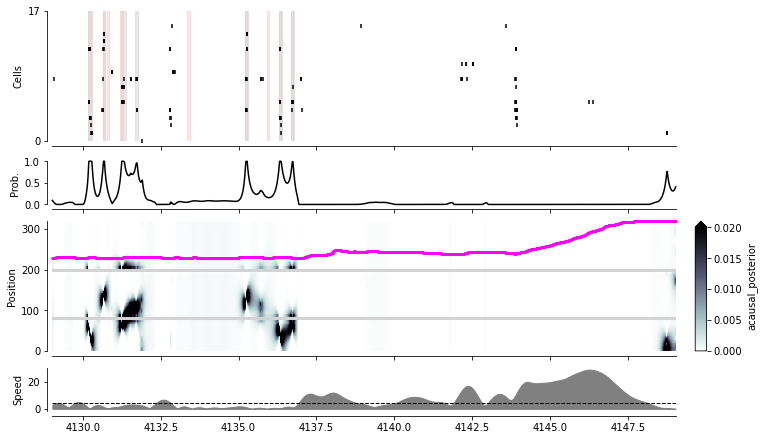

In [809]:
time_ind = slice(200_000, 210_000)

plot_detector(time_ind, data, replay_detector, detector_results)

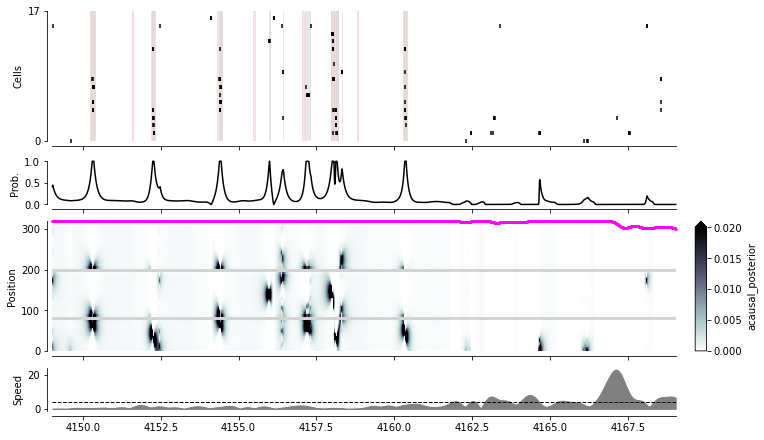

In [810]:
time_ind = slice(210_000, 220_000)

plot_detector(time_ind, data, replay_detector, detector_results)

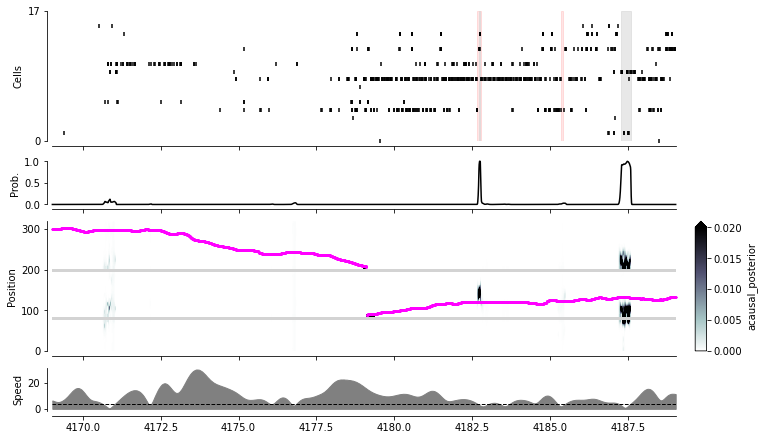

In [811]:
time_ind = slice(220_000, 230_000)

plot_detector(time_ind, data, replay_detector, detector_results)

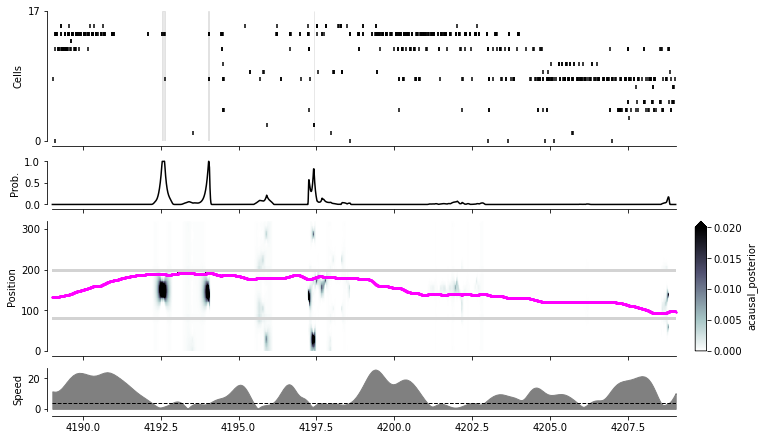

In [813]:
time_ind = slice(230_000, 240_000)

plot_detector(time_ind, data, replay_detector, detector_results)

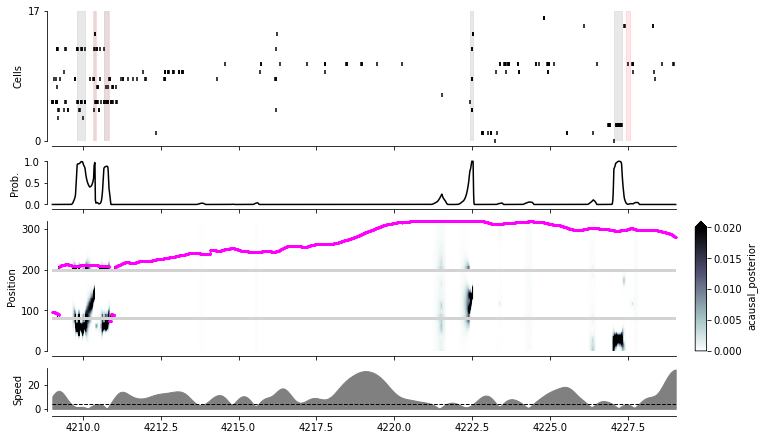

In [816]:
time_ind = slice(240_000, 250_000)

plot_detector(time_ind, data, replay_detector, detector_results)

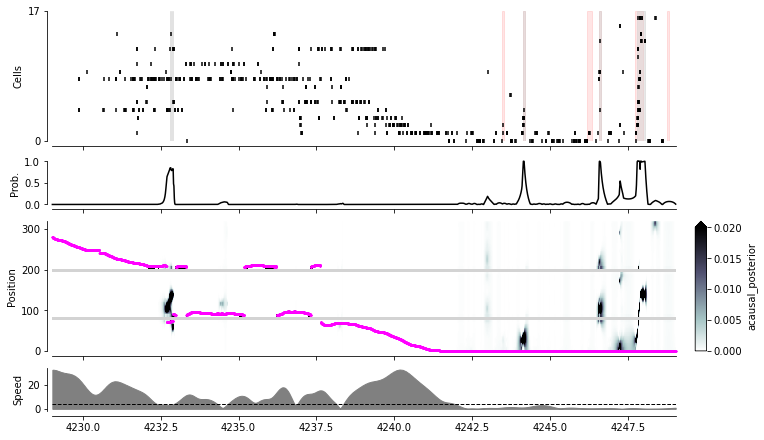

In [818]:
time_ind = slice(250_000, 260_000)

plot_detector(time_ind, data, replay_detector, detector_results)

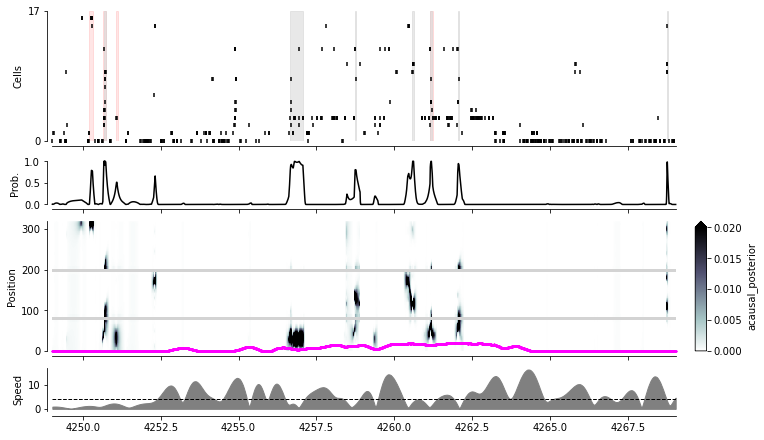

In [819]:
time_ind = slice(260_000, 270_000)

plot_detector(time_ind, data, replay_detector, detector_results)

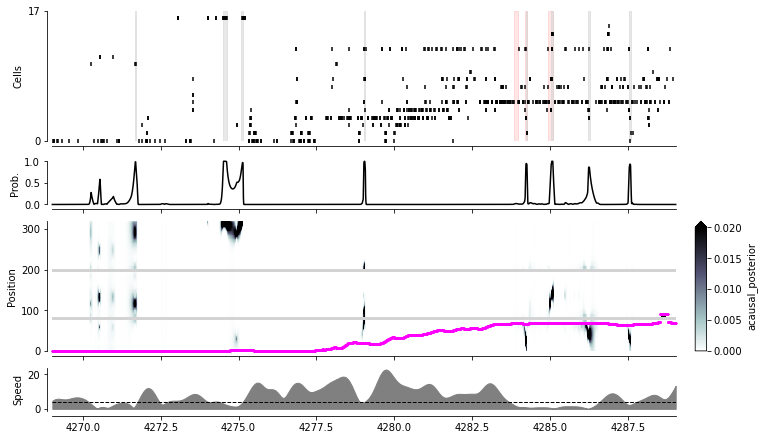

In [821]:
time_ind = slice(270_000, 280_000)

plot_detector(time_ind, data, replay_detector, detector_results)

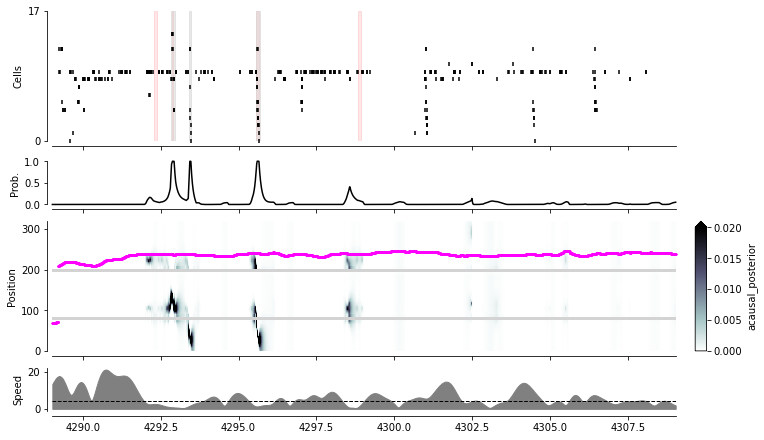

In [823]:
time_ind = slice(280_000, 290_000)

plot_detector(time_ind, data, replay_detector, detector_results)

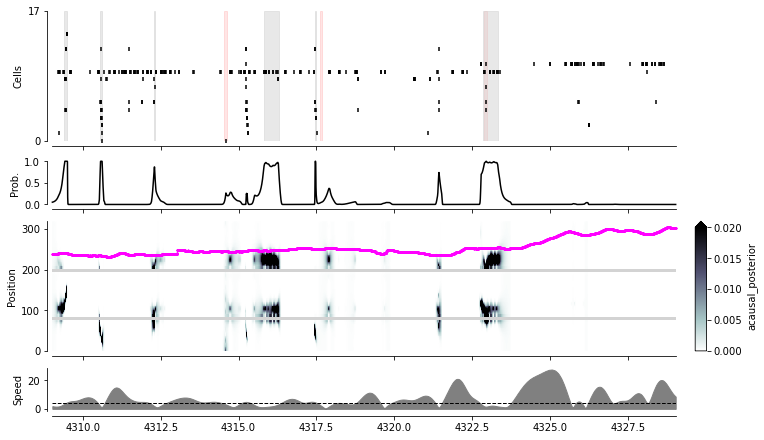

In [825]:
time_ind = slice(290_000, 300_000)

plot_detector(time_ind, data, replay_detector, detector_results)

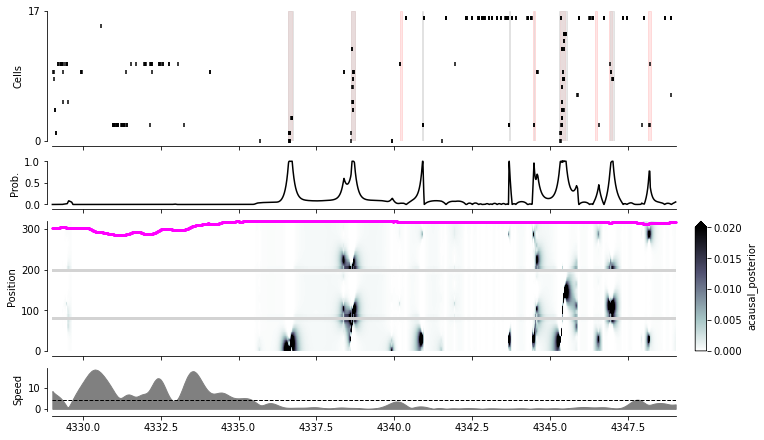

In [827]:
time_ind = slice(300_000, 310_000)

plot_detector(time_ind, data, replay_detector, detector_results)

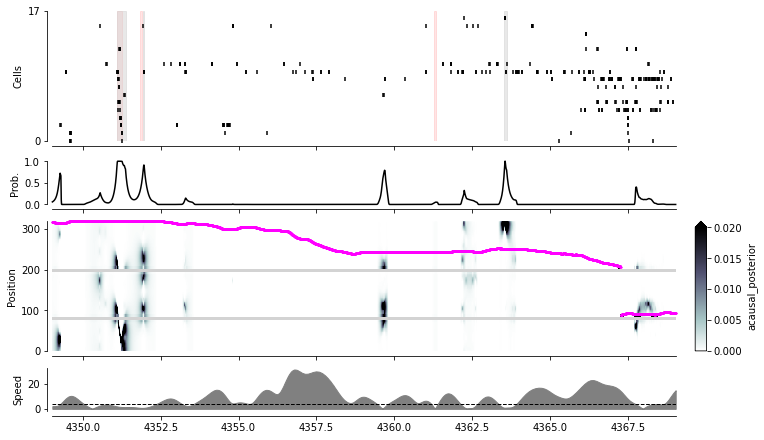

In [873]:
time_ind = slice(310_000, 320_000)

plot_detector(time_ind, data, replay_detector, detector_results)

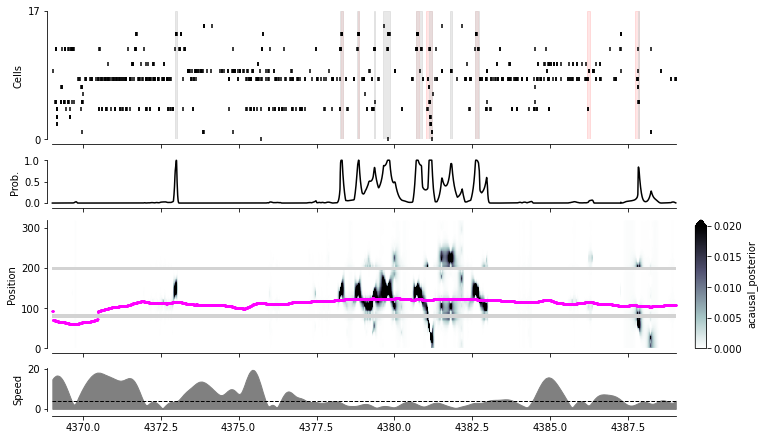

In [872]:
time_ind = slice(320_000, 330_000)

plot_detector(time_ind, data, replay_detector, detector_results)

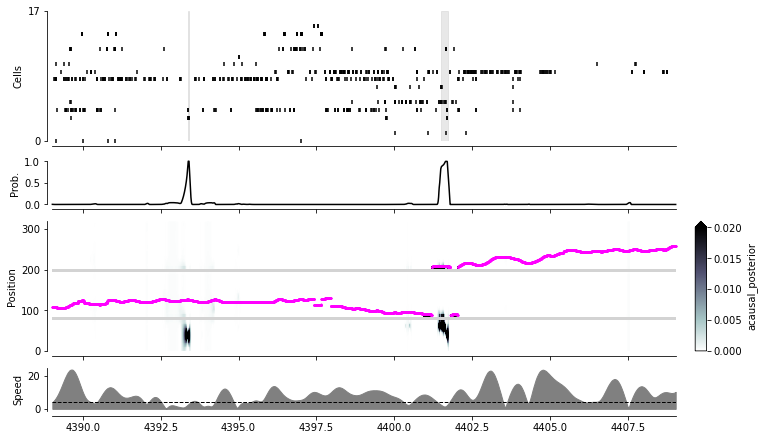

In [832]:
time_ind = slice(330_000, 340_000)

plot_detector(time_ind, data, replay_detector, detector_results)

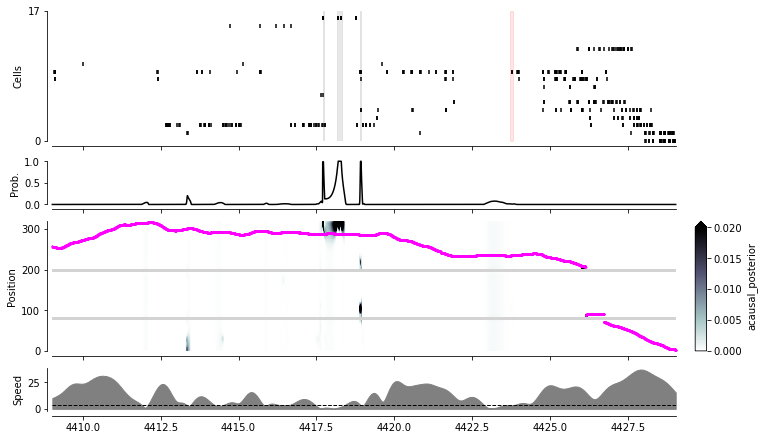

In [833]:
time_ind = slice(340_000, 350_000)

plot_detector(time_ind, data, replay_detector, detector_results)

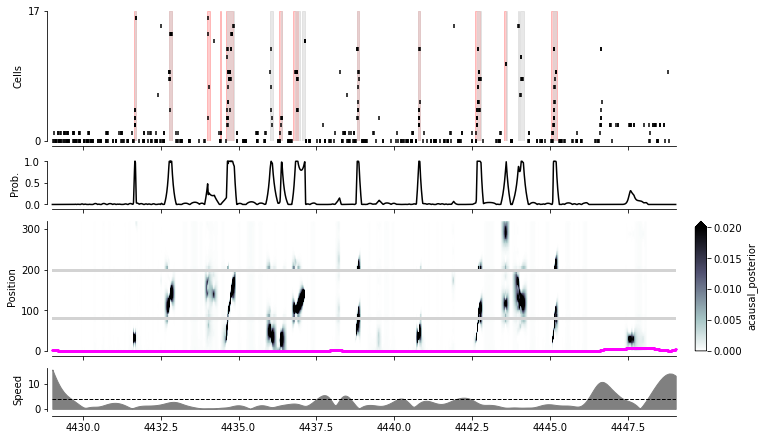

In [867]:
time_ind = slice(350_000, 360_000)

plot_detector(time_ind, data, replay_detector, detector_results)

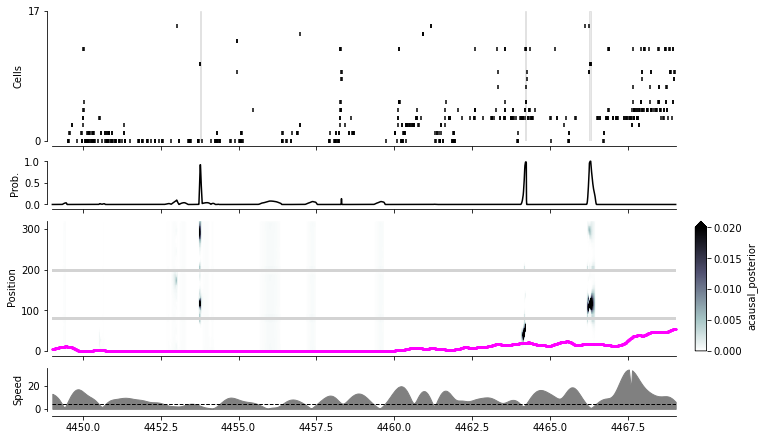

In [837]:
time_ind = slice(360_000, 370_000)

plot_detector(time_ind, data, replay_detector, detector_results)

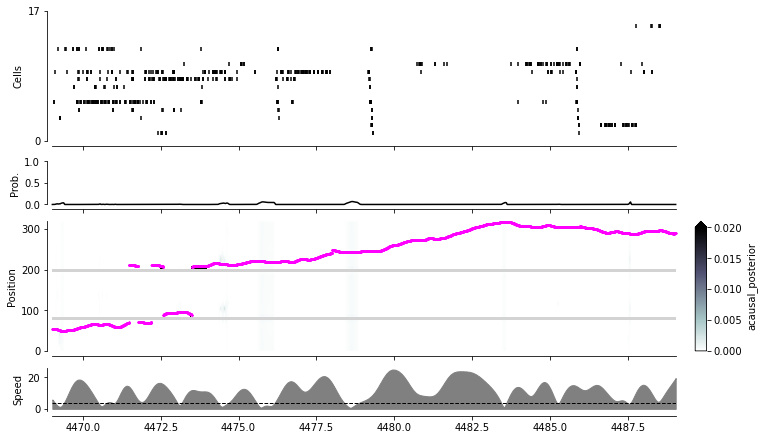

In [839]:
time_ind = slice(370_000, 380_000)

plot_detector(time_ind, data, replay_detector, detector_results)

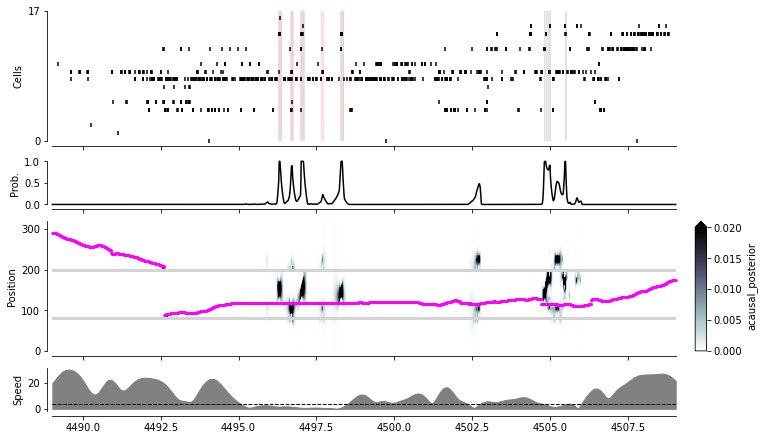

In [870]:
time_ind = slice(380_000, 390_000)

plot_detector(time_ind, data, replay_detector, detector_results)

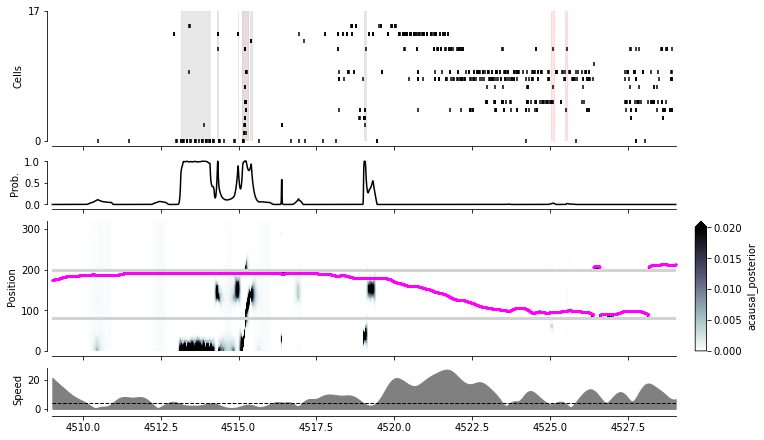

In [871]:
time_ind = slice(390_000, 400_000)

plot_detector(time_ind, data, replay_detector, detector_results)

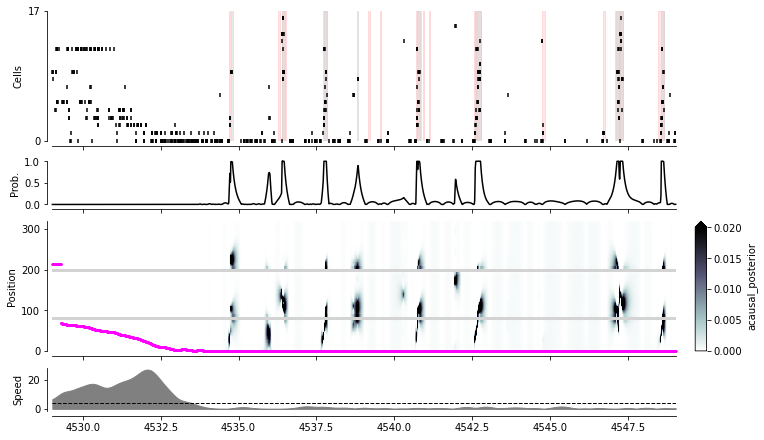

In [845]:
time_ind = slice(400_000, 410_000)

plot_detector(time_ind, data, replay_detector, detector_results)

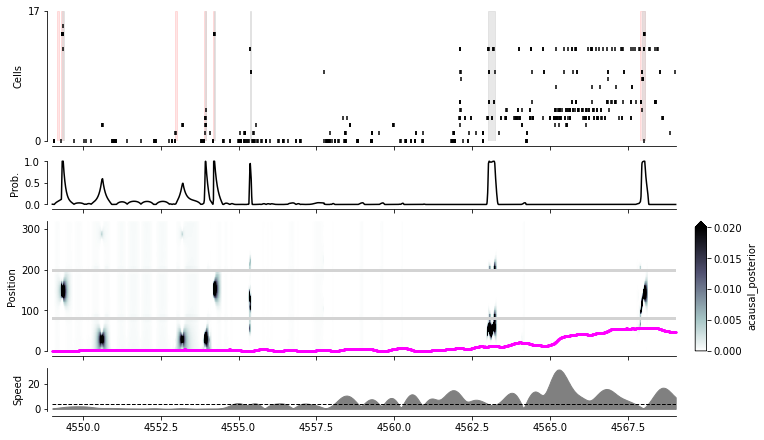

In [846]:
time_ind = slice(410_000, 420_000)

plot_detector(time_ind, data, replay_detector, detector_results)

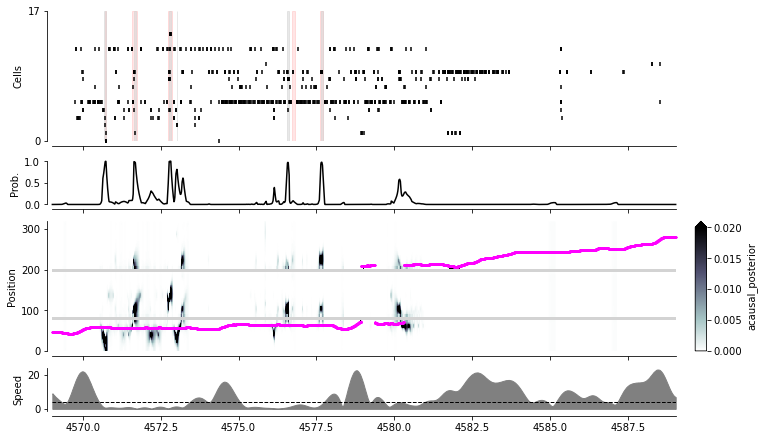

In [847]:
time_ind = slice(420_000, 430_000)

plot_detector(time_ind, data, replay_detector, detector_results)

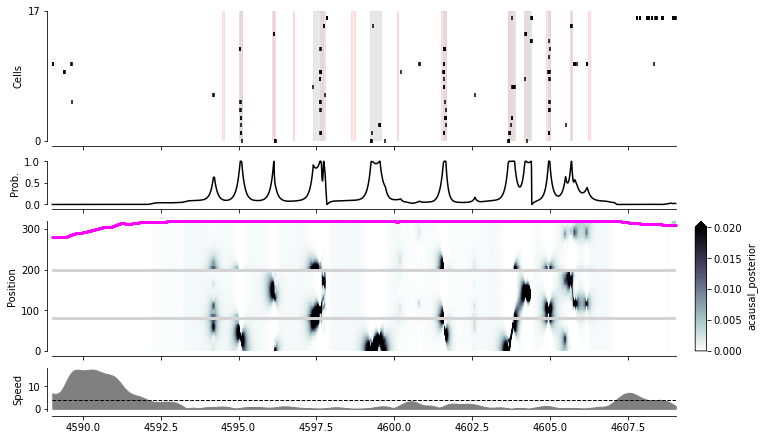

In [849]:
time_ind = slice(430_000, 440_000)

plot_detector(time_ind, data, replay_detector, detector_results)

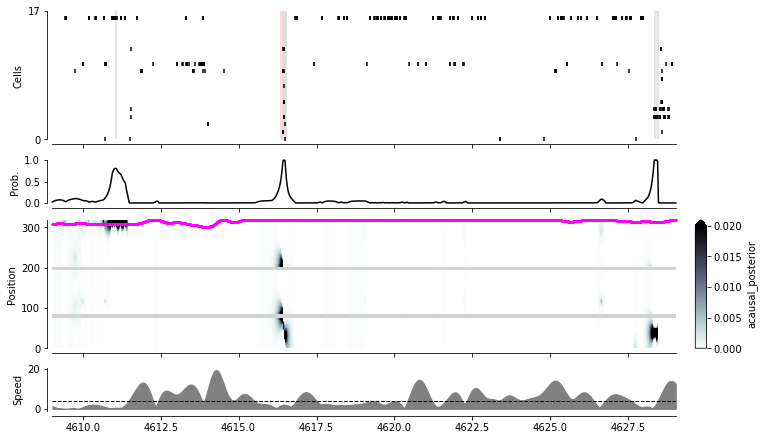

In [850]:
time_ind = slice(440_000, 450_000)

plot_detector(time_ind, data, replay_detector, detector_results)

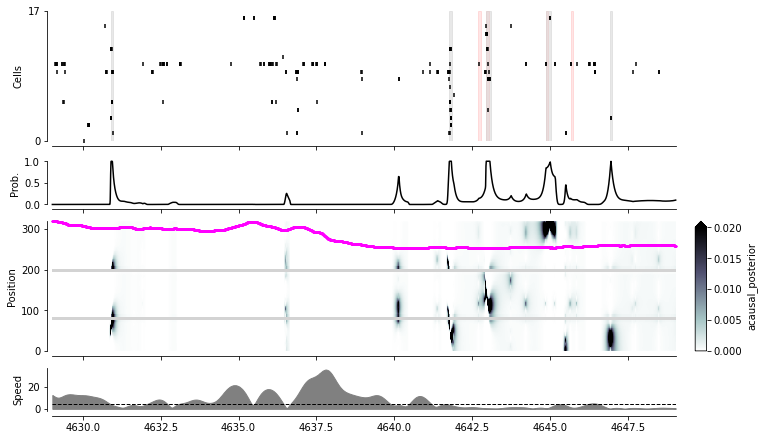

In [851]:
time_ind = slice(450_000, 460_000)

plot_detector(time_ind, data, replay_detector, detector_results)

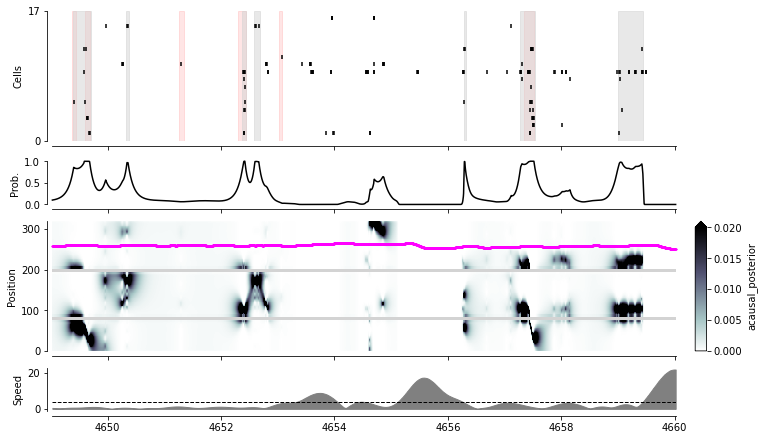

In [852]:
time_ind = slice(460_000, 470_000)

plot_detector(time_ind, data, replay_detector, detector_results)

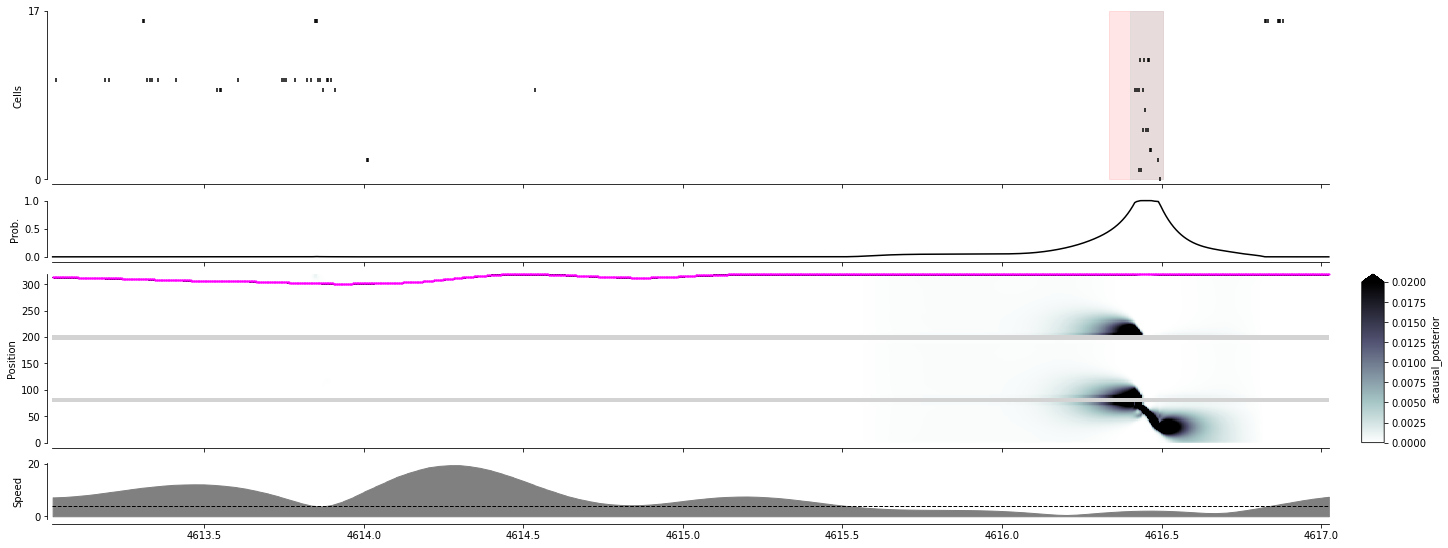

In [855]:
time_ind = slice(442_000, 444_000)

plot_detector(time_ind, data, replay_detector, detector_results, figsize=(20, 7.5))

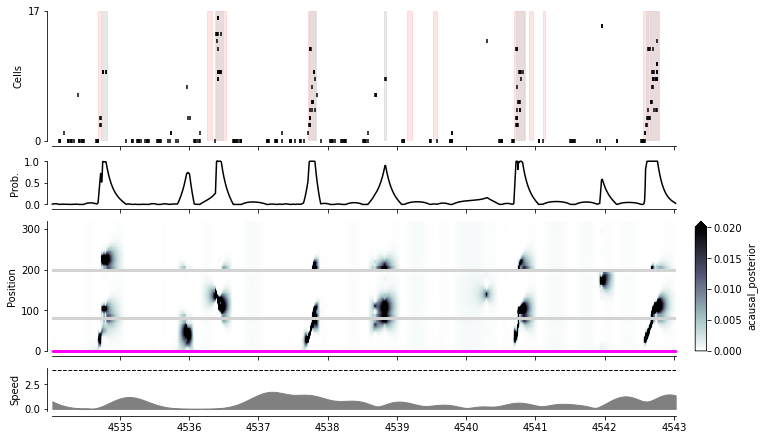

In [856]:
time_ind = slice(402_500, 407_000)

plot_detector(time_ind, data, replay_detector, detector_results)

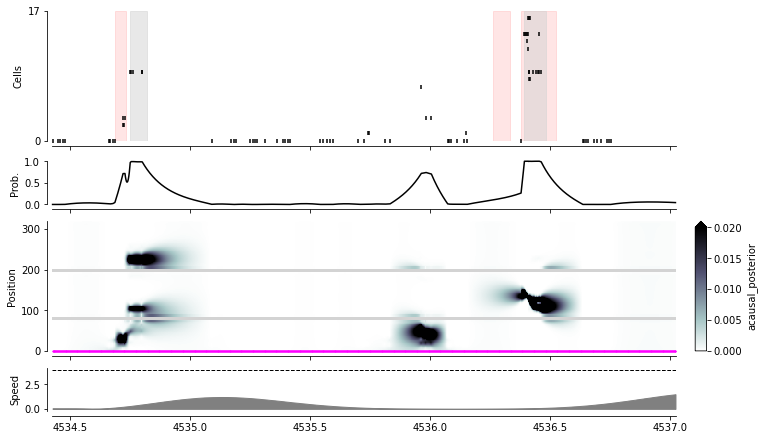

In [858]:
time_ind = slice(402_700, 404_000)

plot_detector(time_ind, data, replay_detector, detector_results)

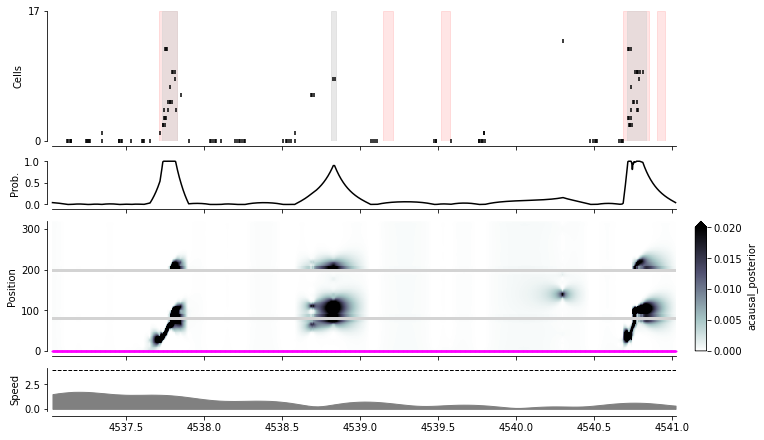

In [859]:
time_ind = slice(404_000, 406_000)

plot_detector(time_ind, data, replay_detector, detector_results)

IDEA: using hierachical clustering like in HDBSCAN to choose threshold for non-local

In [861]:
from replay_identification.core import get_observed_position_bin

observed_position_bin = get_observed_position_bin(
    np.asarray(data['position_info'].linear_position), replay_detector.place_bin_edges_, replay_detector.is_track_interior_)

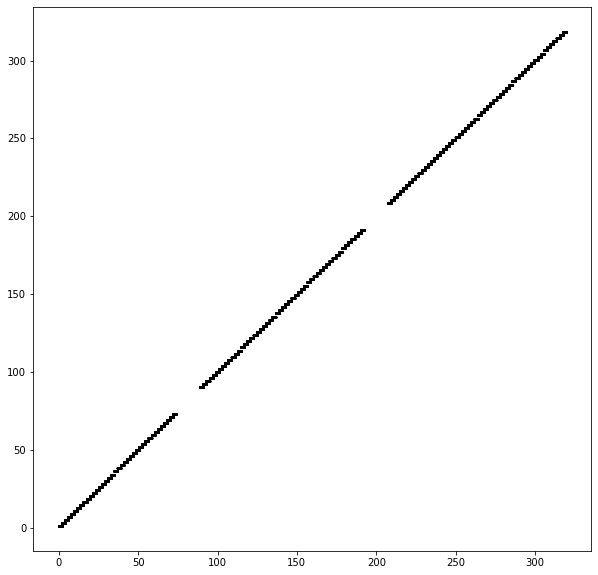

In [866]:
plt.figure(figsize=(10, 10))
plt.scatter(np.asarray(data['position_info'].linear_position),
            replay_detector.place_bin_centers_[observed_position_bin], s=1, color='black', alpha=0.5)